In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('fivethirtyeight')

In [26]:
df=pd.read_csv('D:/class_255/Project/US_Accidents_Dec19.csv',header=0)

In [27]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [28]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [29]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [30]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.246264e+06,2.974335e+06,2.974335e+06,2.974335e+06,728071.000000,728071.000000,2.974335e+06,1.056730e+06,2.918272e+06,1.121712e+06,2.915162e+06,2.926193e+06,2.908644e+06,2.533495e+06,975977.000000
mean,2.078316e+02,2.360190e+00,3.649361e+01,-9.542625e+01,37.580871,-99.976032,2.855654e-01,5.837004e+03,6.235120e+01,5.132685e+01,6.540542e+01,2.983190e+01,9.150770e+00,8.298064e+00,0.020495
std,2.032959e+01,5.414733e-01,4.918849e+00,1.721881e+01,5.004757,18.416647,1.548392e+00,1.515928e+04,1.878855e+01,2.519127e+01,2.255676e+01,7.213808e-01,2.892114e+00,5.138546e+00,0.235770
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,24.570110,-124.497829,0.000000e+00,0.000000e+00,-7.780000e+01,-6.590000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.010000e+02,2.000000e+00,3.355040e+01,-1.172920e+02,33.957554,-118.286610,0.000000e+00,8.370000e+02,5.000000e+01,3.200000e+01,4.900000e+01,2.982000e+01,1.000000e+01,4.600000e+00,0.000000
50%,2.010000e+02,2.000000e+00,3.584969e+01,-9.025083e+01,37.903670,-96.631690,0.000000e+00,2.717000e+03,6.440000e+01,5.400000e+01,6.700000e+01,2.998000e+01,1.000000e+01,7.000000e+00,0.000000
75%,2.010000e+02,3.000000e+00,4.037026e+01,-8.091891e+01,41.372630,-82.323850,1.000000e-02,7.000000e+03,7.600000e+01,7.300000e+01,8.400000e+01,3.011000e+01,1.000000e+01,1.040000e+01,0.000000
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,25.000000


In [32]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df.dtypes

ID                               object
Source                           object
TMC                             float64
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64


In [33]:
df.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

In [34]:
df.isna().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

In [7]:
pip install plotly-geo

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# State Analysis

In [35]:
states = df.State.unique()

In [36]:
count_by_state=[]
for i in df.State.unique():
    count_by_state.append(df[df['State']==i].count()['ID'])

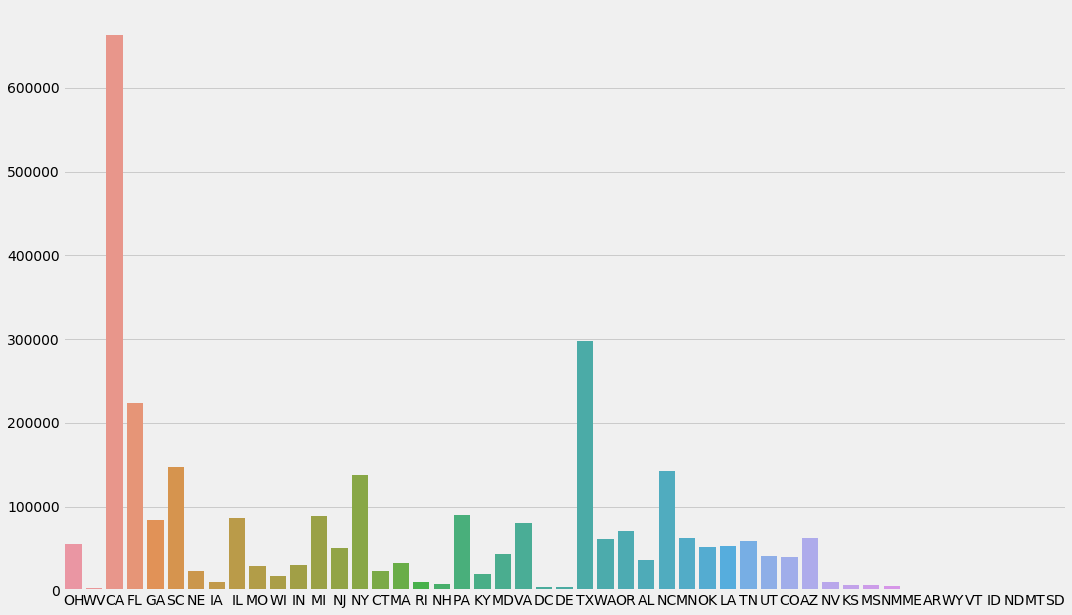

In [37]:
# Accidents Count by states 

plt.figure(figsize=(16,10))
sns.barplot(states, count_by_state)

In [38]:
#  Accidents Count by states 

import plotly.graph_objects as go
state_count_acc = pd.value_counts(df['State'])

fig = go.Figure(data=go.Choropleth(
    locations=state_count_acc.index,
    z = state_count_acc.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Count Accidents",
))

fig.update_layout(
    title_text = '2016 - 2019 US Traffic Accident Dataset by State',
    geo_scope='usa',
)

fig.show()

# Severity Analysis

In [39]:
Sev_Ana = df.groupby('Severity').count()
Sev_Ana

,ID,Source,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Severity,,,,,,,,,,,,,,,,,,,,,
1,968,968,968,968,968,968,968,0,0,968,...,968,968,968,968,968,968,968,968,968,968
2,1993410,1993410,1468069,1993410,1993410,1993410,1993410,525341,525341,1993410,...,1993410,1993410,1993410,1993410,1993410,1993410,1993345,1993345,1993345,1993345
3,887620,887620,772423,887620,887620,887620,887620,115197,115197,887620,...,887620,887620,887620,887620,887620,887620,887609,887609,887609,887609
4,92337,92337,4804,92337,92337,92337,92337,87533,87533,92337,...,92337,92337,92337,92337,92337,92337,92320,92320,92320,92320


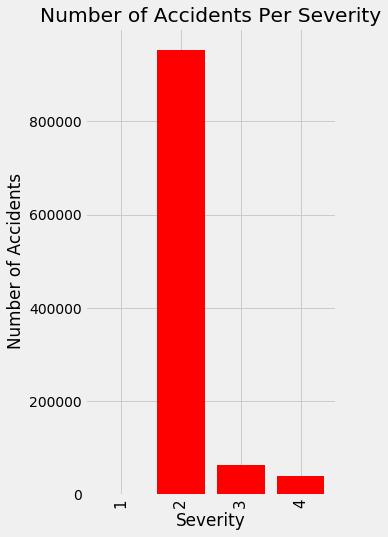

In [40]:
# Severity value counts 

plt.figure(figsize=(4, 8))
plt.title('Number of Accidents Per Severity')
plt.bar(Sev_Ana.index, Sev_Ana.Number, color='r')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(Sev_Ana.index, rotation='vertical', size=15)
plt.show()

In [41]:
severity_1_by_state = []
severity_2_by_state = []
severity_3_by_state = []
severity_4_by_state = []
for i in states:
    severity_1_by_state.append(df[(df['Severity']==1)&(df['State']==i)].count()['ID'])
    severity_2_by_state.append(df[(df['Severity']==2)&(df['State']==i)].count()['ID'])
    severity_3_by_state.append(df[(df['Severity']==3)&(df['State']==i)].count()['ID'])
    severity_4_by_state.append(df[(df['Severity']==4)&(df['State']==i)].count()['ID'])

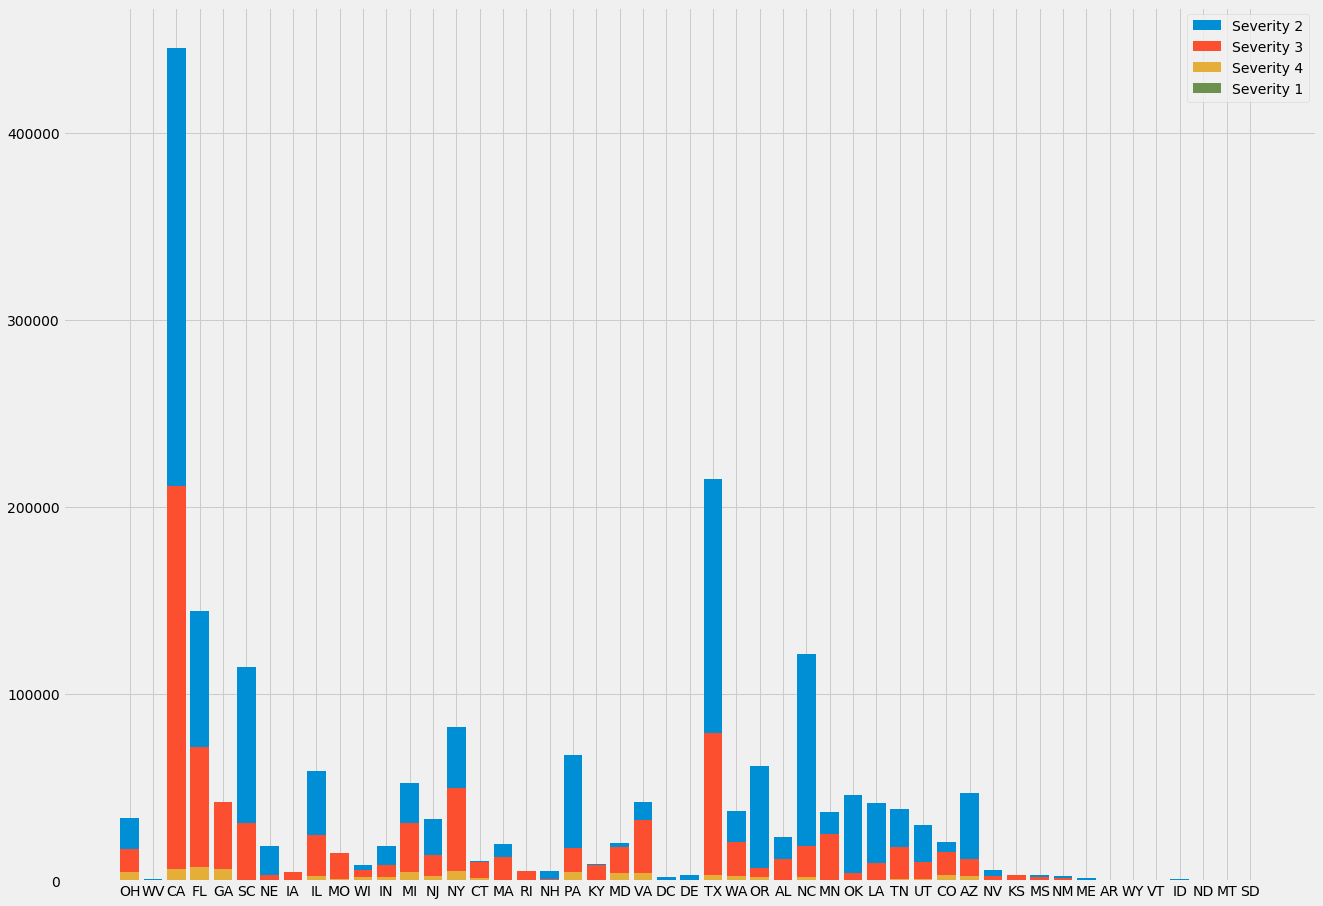

In [42]:
plt.figure(figsize=(20,15))

plt.bar(states, severity_2_by_state, label='Severity 2')
plt.bar(states, severity_3_by_state, label='Severity 3')
plt.bar(states, severity_4_by_state, label='Severity 4')
plt.bar(states, severity_1_by_state, label='Severity 1')


plt.legend()

# Weather Analysis

In [43]:
# Weather condition count

Weather = df.groupby('Weather_Condition').count()
Weather

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Weather_Condition,,,,,,,,,,,,,,,,,,,,,
Blowing Dust,44,44,11,44,44,44,44,44,33,33,...,44,44,44,44,44,44,44,44,44,44
Blowing Dust / Windy,64,64,43,64,64,64,64,64,21,21,...,64,64,64,64,64,64,64,64,64,64
Blowing Sand,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
Blowing Snow,268,268,190,268,268,268,268,268,78,78,...,268,268,268,268,268,268,268,268,268,268
Blowing Snow / Windy,10,10,6,10,10,10,10,10,4,4,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volcanic Ash,22,22,18,22,22,22,22,22,4,4,...,22,22,22,22,22,22,22,22,22,22
Widespread Dust,129,129,98,129,129,129,129,129,31,31,...,129,129,129,129,129,129,129,129,129,129
Widespread Dust / Windy,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1


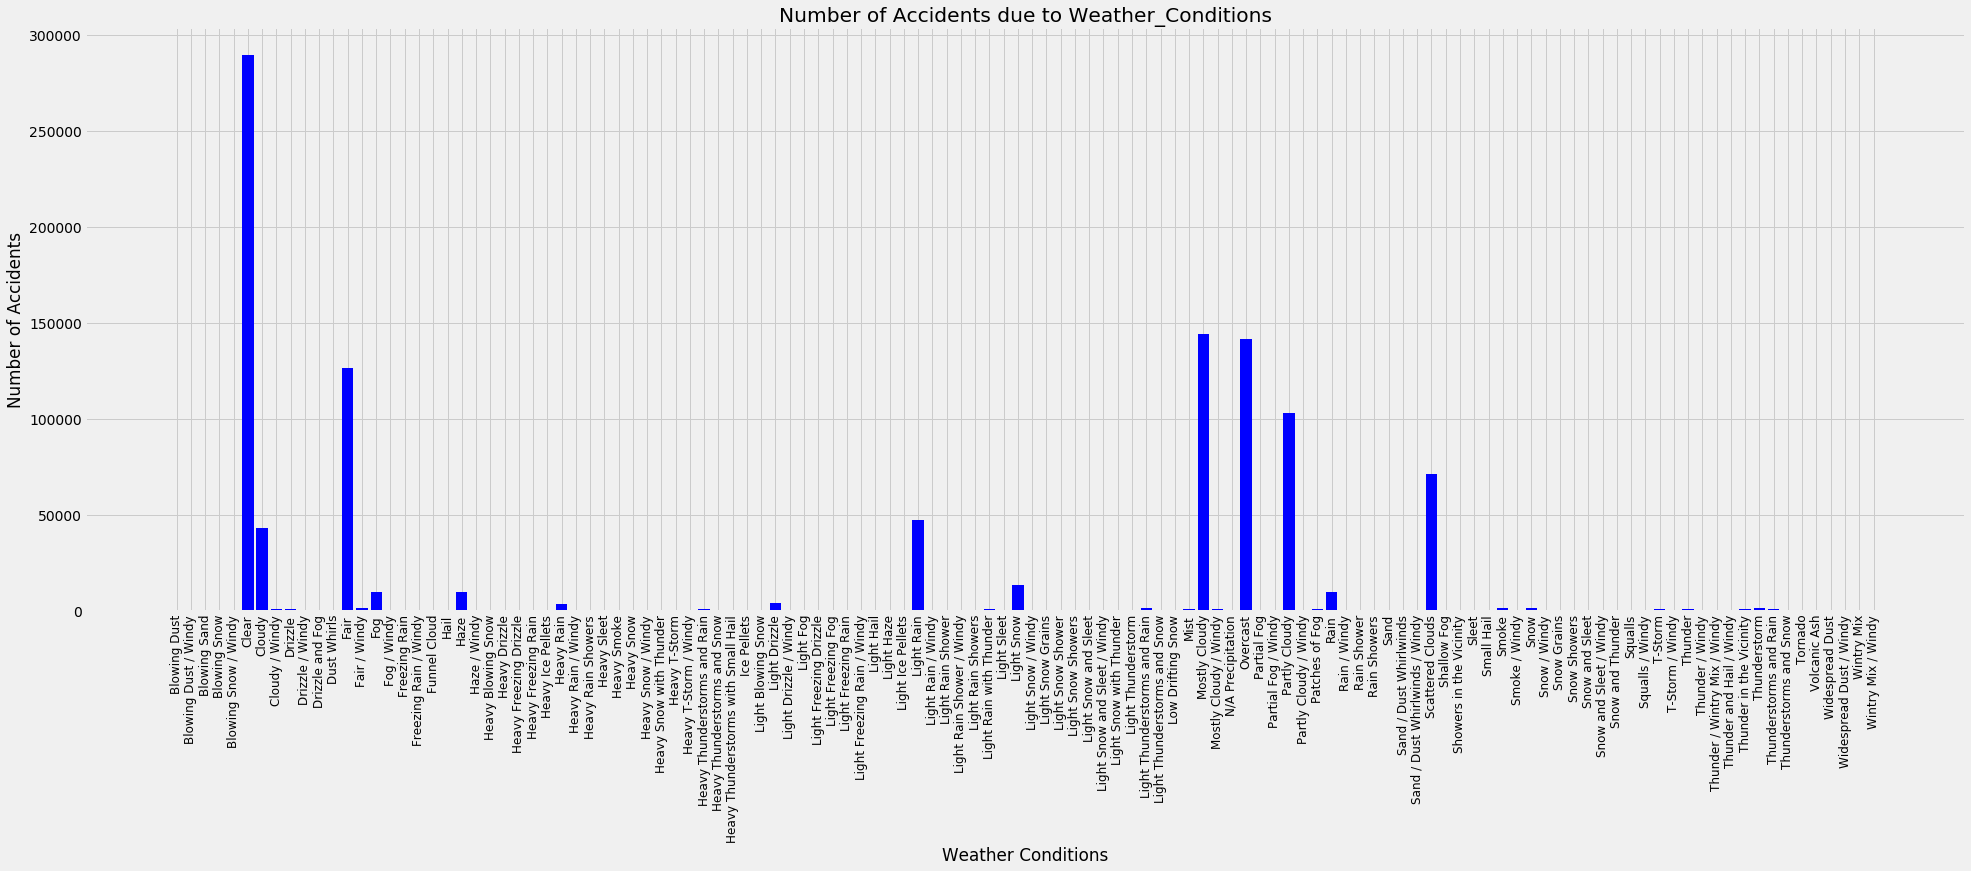

In [45]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents due to Weather_Conditions')
plt.bar(Weather.index, Weather.Number, color='b')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(Weather.index, rotation='vertical', size=12)
plt.show()

# Time Analysis

In [46]:
#Add day's column in our data.
df['day'] = df['Start_Time'].dt.day

#Add Week_day column in the data.
df['weekday'] = df['Start_Time'].dt.weekday

#Add Month column in the data.
df['month'] = df['Start_Time'].dt.month

#Add Hour column in the data.
df['hour'] = df['Start_Time'].dt.hour

In [47]:
# converted data by day

df['Start_Time'].dt.day


0           8
1           8
2           8
3           8
4           8
           ..
2974330    23
2974331    23
2974332    23
2974333    23
2974334    23
Name: Start_Time, Length: 2974335, dtype: int64

In [48]:
# Converting all the data with the day

Time = df.groupby('day').count()
Time

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,weekday,month,hour
day,,,,,,,,,,,,,,,,,,,,,
1,92827,92827,70295,92827,92827,92827,92827,92827,22532,22532,...,92827,92827,92827,92818,92818,92818,92818,92827,92827,92827
2,92019,92019,70431,92019,92019,92019,92019,92019,21588,21588,...,92019,92019,92019,92014,92014,92014,92014,92019,92019,92019
3,92060,92060,69191,92060,92060,92060,92060,92060,22869,22869,...,92060,92060,92060,92058,92058,92058,92058,92060,92060,92060
4,95379,95379,71019,95379,95379,95379,95379,95379,24360,24360,...,95379,95379,95379,95373,95373,95373,95373,95379,95379,95379
5,103116,103116,76788,103116,103116,103116,103116,103116,26328,26328,...,103116,103116,103116,103113,103113,103113,103113,103116,103116,103116
6,103490,103490,77196,103490,103490,103490,103490,103490,26294,26294,...,103490,103490,103490,103487,103487,103487,103487,103490,103490,103490
7,101246,101246,75514,101246,101246,101246,101246,101246,25732,25732,...,101246,101246,101246,101244,101244,101244,101244,101246,101246,101246
8,100510,100510,75348,100510,100510,100510,100510,100510,25162,25162,...,100510,100510,100510,100510,100510,100510,100510,100510,100510,100510
9,99940,99940,75289,99940,99940,99940,99940,99940,24651,24651,...,99940,99940,99940,99937,99937,99937,99937,99940,99940,99940


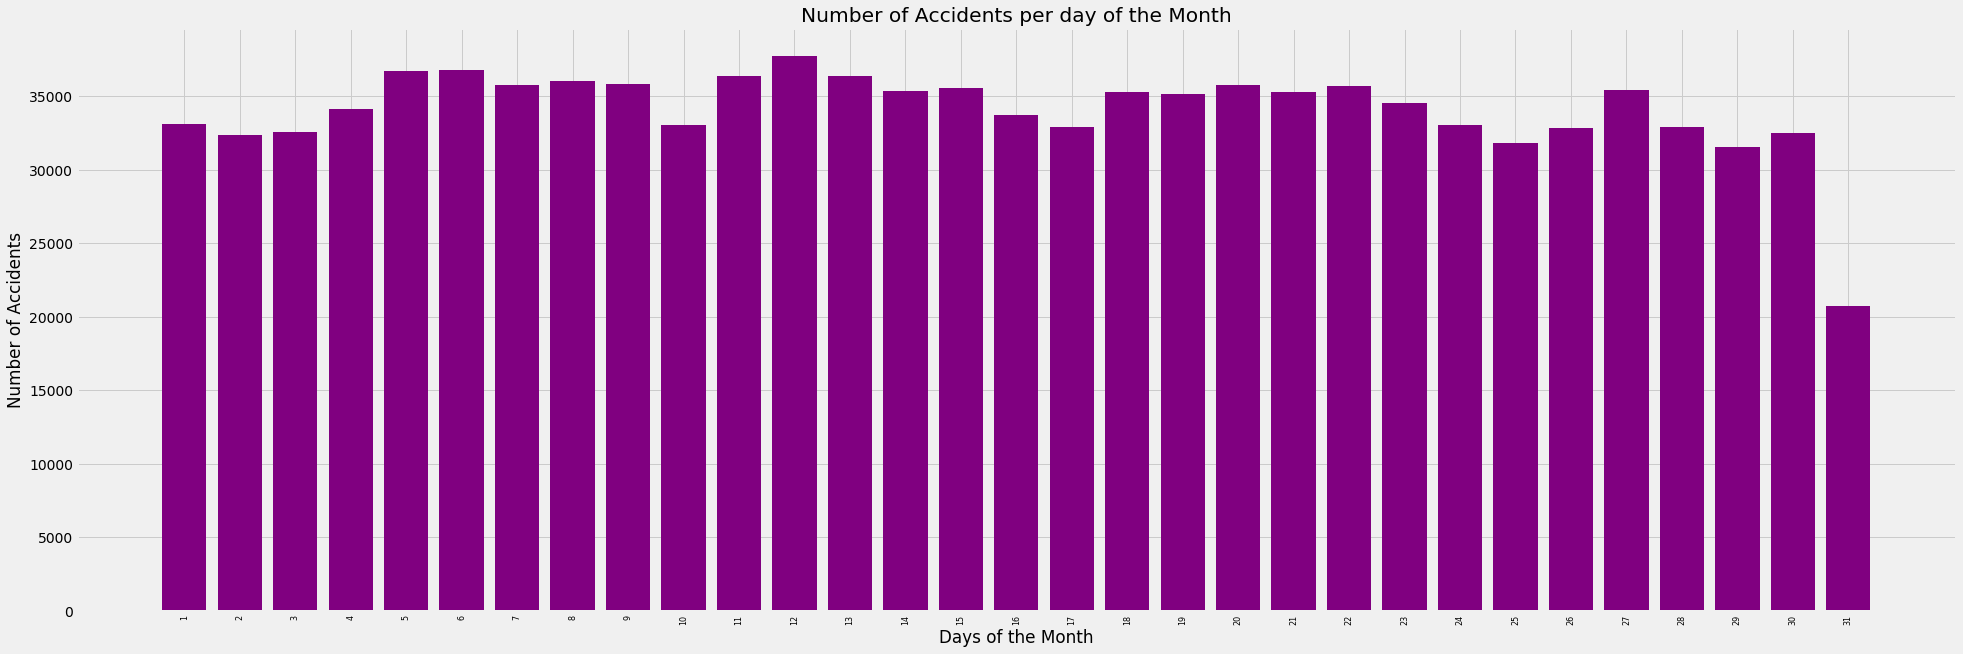

In [49]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per day of the Month')
plt.bar(Time.index, Time.Number, color='purple')
plt.xlabel('Days of the Month')
plt.ylabel('Number of Accidents')
plt.xticks(Time.index, rotation='vertical', size=8)
plt.show()

In [50]:
# Converting all the data with the weekday

Weekday = df.groupby('weekday').count()
Weekday

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day,month,hour
weekday,,,,,,,,,,,,,,,,,,,,,
0,507255,507255,387772,507255,507255,507255,507255,507255,119483,119483,...,507255,507255,507255,507237,507237,507237,507237,507255,507255,507255
1,543725,543725,410976,543725,543725,543725,543725,543725,132749,132749,...,543725,543725,543725,543705,543705,543705,543705,543725,543725,543725
2,537474,537474,407787,537474,537474,537474,537474,537474,129687,129687,...,537474,537474,537474,537449,537449,537449,537449,537474,537474,537474
3,526138,526138,398309,526138,526138,526138,526138,526138,127829,127829,...,526138,526138,526138,526131,526131,526131,526131,526138,526138,526138
4,537749,537749,408770,537749,537749,537749,537749,537749,128979,128979,...,537749,537749,537749,537731,537731,537731,537731,537749,537749,537749
5,170349,170349,124470,170349,170349,170349,170349,170349,45879,45879,...,170349,170349,170349,170347,170347,170347,170347,170349,170349,170349
6,151645,151645,108180,151645,151645,151645,151645,151645,43465,43465,...,151645,151645,151645,151642,151642,151642,151642,151645,151645,151645


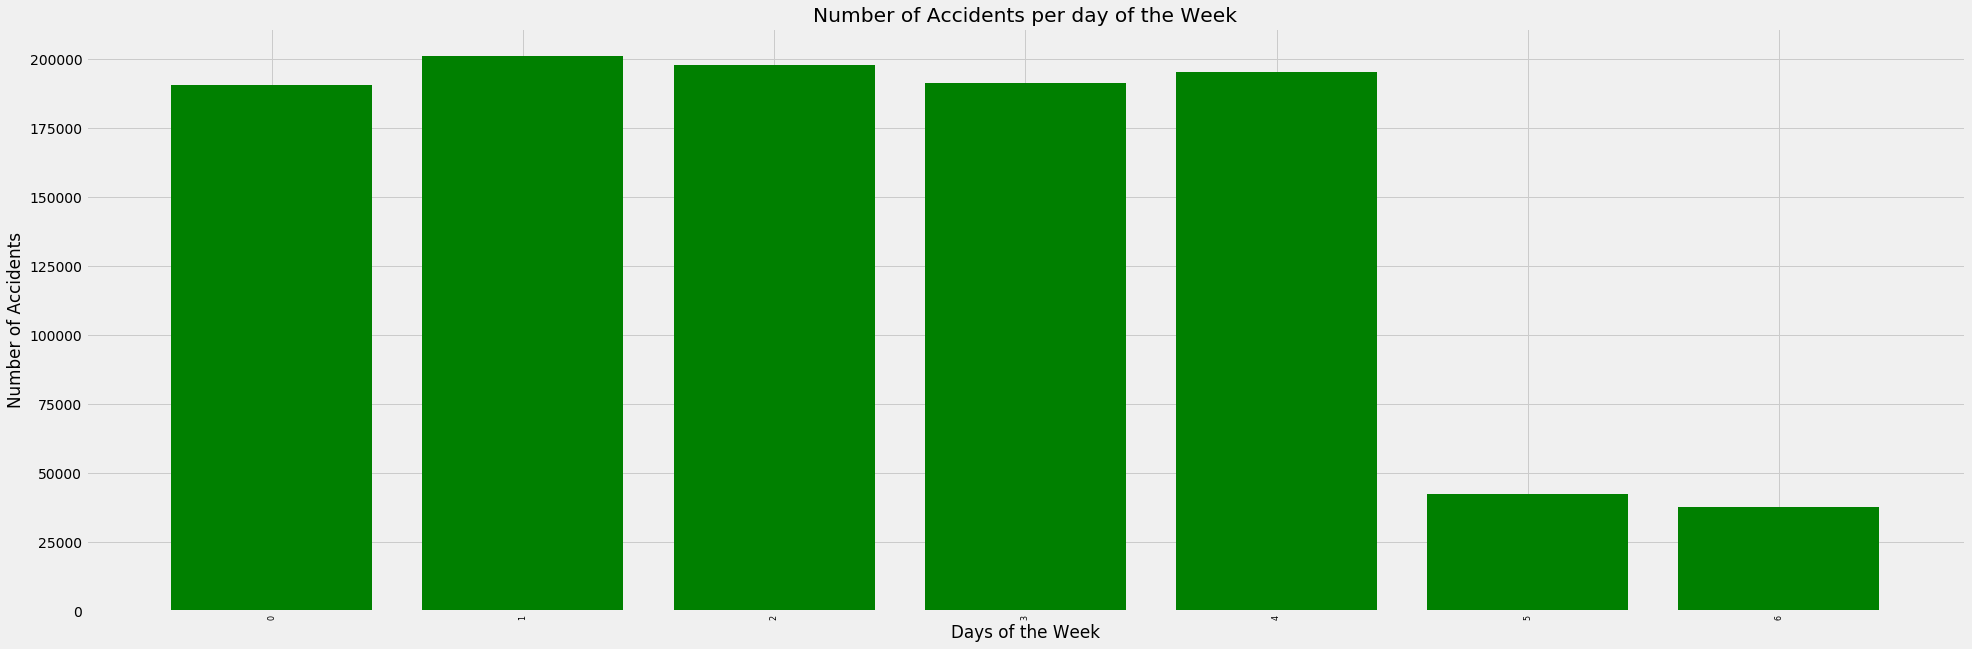

In [51]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per day of the Week')
plt.bar(Weekday.index, Weekday.Number, color='g')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(Weekday.index, rotation='vertical', size=8)
plt.show()

In [52]:
# # Converting all the data by hour

Hour = df.groupby('hour').count()
Hour

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day,weekday,month
hour,,,,,,,,,,,,,,,,,,,,,
0,23189,23189,12034,23189,23189,23189,23189,23189,11155,11155,...,23189,23189,23189,23183,23183,23183,23183,23189,23189,23189
1,18000,18000,10128,18000,18000,18000,18000,18000,7872,7872,...,18000,18000,18000,17999,17999,17999,17999,18000,18000,18000
2,18944,18944,10716,18944,18944,18944,18944,18944,8228,8228,...,18944,18944,18944,18944,18944,18944,18944,18944,18944,18944
3,18600,18600,9966,18600,18600,18600,18600,18600,8634,8634,...,18600,18600,18600,18600,18600,18600,18600,18600,18600,18600
4,53594,53594,43785,53594,53594,53594,53594,53594,9809,9809,...,53594,53594,53594,53590,53590,53590,53590,53594,53594,53594
5,83866,83866,64202,83866,83866,83866,83866,83866,19664,19664,...,83866,83866,83866,83863,83863,83863,83863,83866,83866,83866
6,169079,169079,134764,169079,169079,169079,169079,169079,34315,34315,...,169079,169079,169079,169070,169070,169070,169070,169079,169079,169079
7,273506,273506,225035,273506,273506,273506,273506,273506,48471,48471,...,273506,273506,273506,273496,273496,273496,273496,273506,273506,273506
8,284274,284274,232793,284274,284274,284274,284274,284274,51481,51481,...,284274,284274,284274,284264,284264,284264,284264,284274,284274,284274


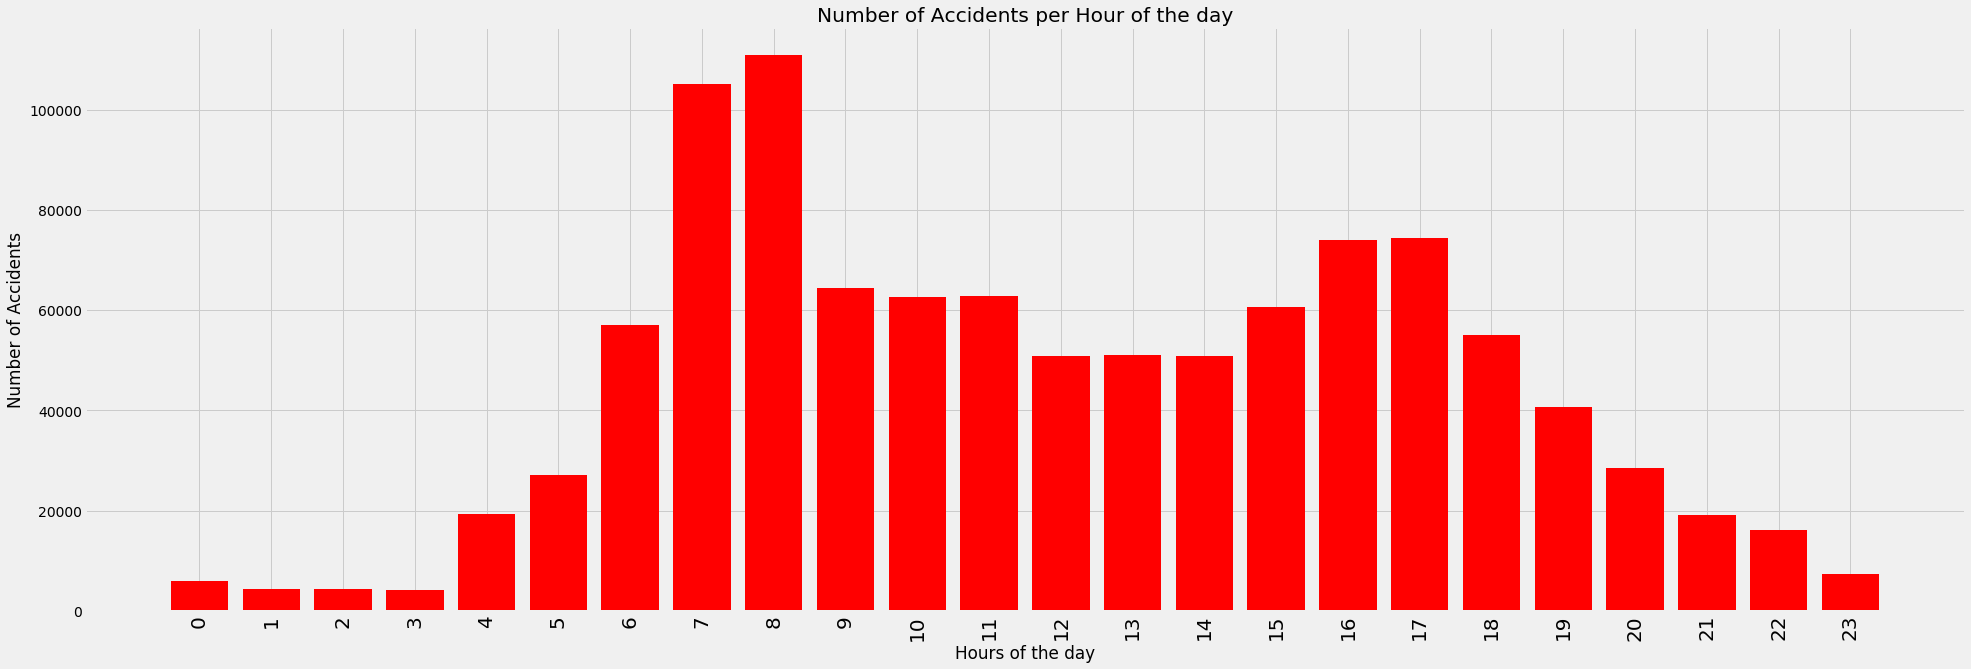

In [53]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per Hour of the day')
plt.bar(Hour.index, Hour.Number, color='r')
plt.xlabel('Hours of the day')
plt.ylabel('Number of Accidents')
plt.xticks(Hour.index, rotation='vertical', size=20)
plt.show()

In [54]:
# Converting all the data by month

Month = df.groupby('month').count()
Month

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day,weekday,hour
month,,,,,,,,,,,,,,,,,,,,,
1,209972,209972,160350,209972,209972,209972,209972,209972,49622,49622,...,209972,209972,209972,209958,209958,209958,209958,209972,209972,209972
2,198649,198649,150858,198649,198649,198649,198649,198649,47791,47791,...,198649,198649,198649,198645,198645,198645,198645,198649,198649,198649
3,207427,207427,159519,207427,207427,207427,207427,207427,47908,47908,...,207427,207427,207427,207422,207422,207422,207422,207427,207427,207427
4,211763,211763,165119,211763,211763,211763,211763,211763,46644,46644,...,211763,211763,211763,211760,211760,211760,211760,211763,211763,211763
5,209060,209060,159673,209060,209060,209060,209060,209060,49387,49387,...,209060,209060,209060,209054,209054,209054,209054,209060,209060,209060
6,210025,210025,162103,210025,210025,210025,210025,210025,47922,47922,...,210025,210025,210025,210018,210018,210018,210018,210025,210025,210025
7,222959,222959,169500,222959,222959,222959,222959,222959,53459,53459,...,222959,222959,222959,222951,222951,222951,222951,222959,222959,222959
8,288912,288912,226514,288912,288912,288912,288912,288912,62398,62398,...,288912,288912,288912,288903,288903,288903,288903,288912,288912,288912
9,292430,292430,217635,292430,292430,292430,292430,292430,74795,74795,...,292430,292430,292430,292424,292424,292424,292424,292430,292430,292430


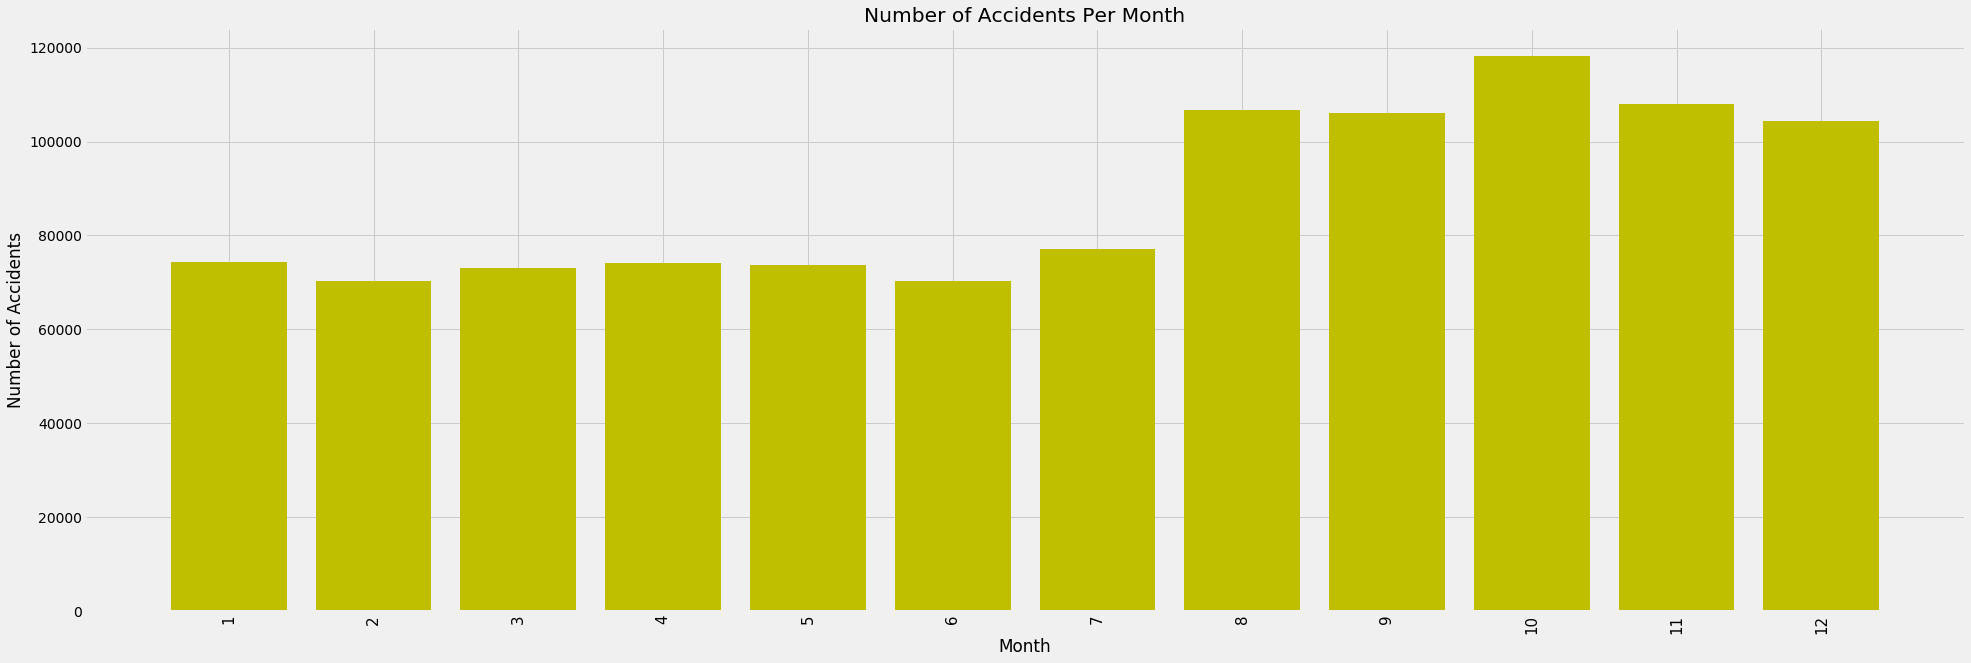

In [55]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents Per Month')
plt.bar(Month.index, Month.Number, color='y')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(Month.index, rotation='vertical', size=15)
plt.show()

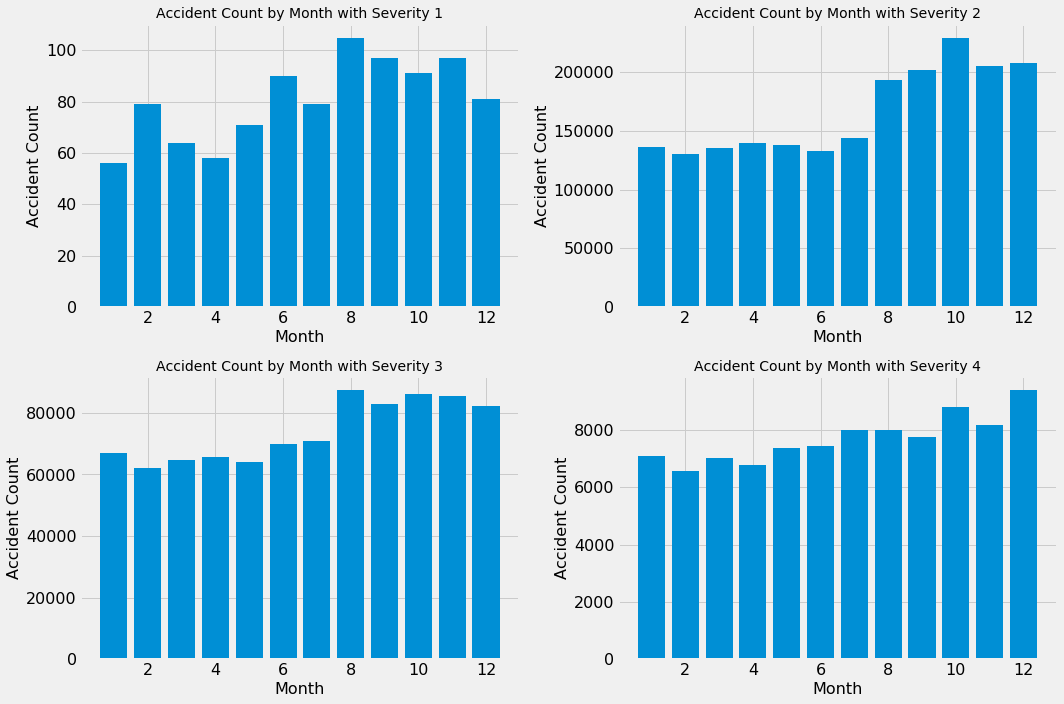

In [56]:
# Showing level of severity along with the monthly analysis 

df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()